In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("heesoo37/120-years-of-olympic-history-athletes-and-results")

print("Path to dataset files:", path)

100%|██████████| 5.43M/5.43M [00:00<00:00, 59.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/versions/2


In [ ]:
import pandas as pd

df = pd.read_csv(path + "/athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### QUESTION: which nations have the highest medal counts over time?

In [ ]:
## BASIC INFO
# df.info()
df.describe()

df["Medal"].value_counts()

,count
Medal,
Gold,13372
Bronze,13295
Silver,13116


In [ ]:
# QUESTION: “Which nations have the highest medal counts over time?”
# get medal counts by nation over all games and all years
# sort them from high to low

medal_counts = df.groupby(["Team"])['Medal'].count().reset_index(name='MedalCount')
medal_counts = df.groupby(['Team', 'Medal'])['Medal'].count().reset_index(name='Count')
medal_counts
df.Team.value_counts()

,count
Team,
United States,17847
France,11988
Great Britain,11404
Italy,10260
Germany,9326
...,...
Briar,1
Hannover,1
Nan-2,1


In [ ]:
# medal_counts.sort_values(by="MedalCount", ascending=False)
medal_table = medal_counts.pivot(index='Team', columns='Medal', values='Count').fillna(0)
medal_table['Total'] = medal_table['Gold'] + medal_table['Silver'] + medal_table['Bronze']
top_nations = medal_table.sort_values(by=['Total'], ascending=False)
top_nations.head(20)

Medal,Bronze,Gold,Silver,Total
Team,,,,
United States,1233.0,2474.0,1512.0,5219.0
Soviet Union,677.0,1058.0,716.0,2451.0
Germany,678.0,679.0,627.0,1984.0
Great Britain,572.0,519.0,582.0,1673.0
France,577.0,455.0,518.0,1550.0
Italy,484.0,535.0,508.0,1527.0
Sweden,507.0,451.0,476.0,1434.0
Australia,511.0,342.0,453.0,1306.0
Canada,408.0,422.0,413.0,1243.0


### QUESTION: “Which nations have shown the greatest improvement?”


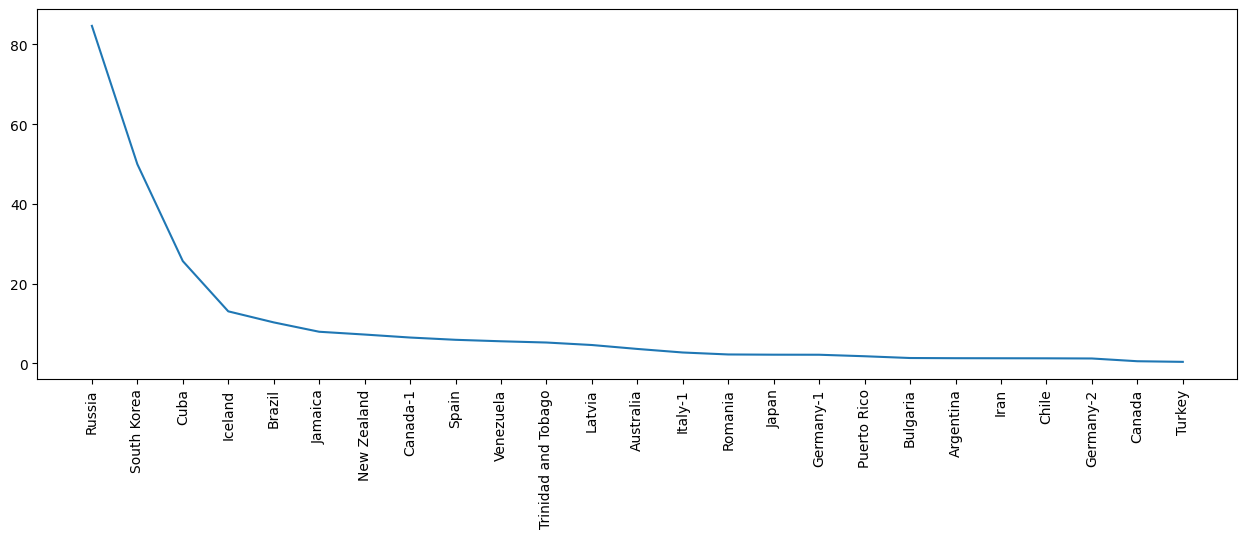

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# QUESTION: “Which nations have shown the greatest improvement?”
# for each country, get total medal counts for following 2 periods: 1950-1960 & 2000-2010
# for each country, get ratio of medals in above periods compared to all medals in that time period
# for each country, get diff between the 2 ratio ranges
# sort the final list descending order to show countries with biggest improvement in ratio of medals to total medals

period1 = df[df['Year'] < 1960]
period2 = df[df['Year'] >= 2000]

period1 = period1.groupby(['Team'])['Medal'].count().reset_index(name='EarlyMedals')
total_medals_1 = period1['EarlyMedals'].sum()
period1['EarlyRatio'] = period1['EarlyMedals'] / total_medals_1 * 100

period2 = period2.groupby(['Team'])['Medal'].count().reset_index(name='LateMedals')
total_medals_2 = period2['LateMedals'].sum()
period2['LateRatio'] = period2['LateMedals'] / total_medals_2 * 100

improvements = period1.merge(period2, on='Team', how='inner')
improvements = improvements[(improvements['LateRatio'] > 0) & (improvements['EarlyRatio'] > 0)]
improvements['Diff_medals'] = improvements['LateMedals'] - improvements['EarlyMedals']
improvements['Diff_ratio'] = improvements['LateRatio'] / improvements['EarlyRatio'] - 1
improvements = improvements.sort_values(by=['Diff_ratio'], ascending=False).head(25)

# visualize the top teams that won the most medals across history
plt.plot(improvements['Team'], improvements['Diff_ratio'])
plt.xticks(rotation=90)
# add more space between x values
plt.subplots_adjust(right=2)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# QUESTION: “Which nations have shown the greatest improvement?”
# for each country, get total medal counts for following 2 periods: 1950-1960 & 2000-2010
# for each country, get ratio of medals in above periods compared to all medals in that time period
# for each country, get diff between the 2 ratio ranges
# sort the final list descending order to show countries with biggest improvement in ratio of medals to total medals

df_medals = df.dropna(subset=['Medal'])

# Step 2: Define the early and late periods
early_period = df_medals[df_medals['Year'] < 1960]
late_period = df_medals[df_medals['Year'] >= 2000]

# Step 3: Group by NOC to count medals in each period
early_medals = early_period.groupby('Team').count()['Medal'].reset_index(name='Early_Medals')
early_medals["early_ratio"] =
late_medals = late_period.groupby('Team').size().reset_index(name='Late_Medals')

# Step 4: Merge the two summaries on Team
improvement = pd.merge(early_medals, late_medals, on='Team', how='inner')

# Calculate the improvement as the difference in medal counts
improvement['Medal_Improvement'] = improvement['Late_Medals'] - improvement['Early_Medals']

# Step 5: Sort nations by the greatest improvement
improvement_sorted = improvement.sort_values('Medal_Improvement', ascending=False)

# Display the top nations with the greatest improvement
improvement_sorted.head(10)


,Team,Early_Medals,Late_Medals,Medal_Improvement
45,Russia,10,913,903
1,Australia,140,693,553
47,South Korea,6,326,320
33,Japan,104,355,251
5,Brazil,21,253,232
48,Spain,33,244,211
7,Canada,305,508,203
10,Cuba,7,199,192
18,Germany,585,775,190
36,Netherlands,275,389,114
